# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating URLs
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Print statement 
print("Beginning Data Retrieval")
print ("---------------------------------------")

#Variables to hold data, and record & set counters for loop to match output
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
country = []
date = []
record_counter = 0
set_counter = 0
records = []
sets = []


#Testing API here
response = requests.get(query_url + "Indianapolis").json()
response

#Beginning loop for cities
for city in cities:
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    print (f'Processing record {record_counter} of set {set_counter} : {city.capitalize()}')
    
    #Try fields to match output file columns for easier reading
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
    #Exception to handle error if city is not found in API
    except:
        print(f"City not found. Skipping...")
        pass
    
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")
          

Beginning Data Retrieval
---------------------------------------
Processing record 1 of set 0 : Denpasar
Processing record 2 of set 0 : Skalistyy
City not found. Skipping...
Processing record 3 of set 0 : Kapaa
Processing record 4 of set 0 : Nabire
Processing record 5 of set 0 : Mampong
Processing record 6 of set 0 : Novopokrovka
Processing record 7 of set 0 : Vaitupu
City not found. Skipping...
Processing record 8 of set 0 : Cherskiy
Processing record 9 of set 0 : Albany
Processing record 10 of set 0 : Cape town
Processing record 11 of set 0 : Hobart
Processing record 12 of set 0 : Tura
Processing record 13 of set 0 : Pevek
Processing record 14 of set 0 : Rikitea
Processing record 15 of set 0 : Thinadhoo
Processing record 16 of set 0 : Punta arenas
Processing record 17 of set 0 : Tsihombe
City not found. Skipping...
Processing record 18 of set 0 : Port blair
Processing record 19 of set 0 : Atka
City not found. Skipping...
Processing record 20 of set 0 : Busselton
Processing record 21 

Processing record 35 of set 3 : Nguiu
City not found. Skipping...
Processing record 36 of set 3 : Kieta
Processing record 37 of set 3 : Ribeira grande
Processing record 38 of set 3 : Victor harbor
Processing record 39 of set 3 : Fortuna
Processing record 40 of set 3 : Comodoro rivadavia
Processing record 41 of set 3 : Arraial do cabo
Processing record 42 of set 3 : Itarema
Processing record 43 of set 3 : Port-gentil
Processing record 44 of set 3 : Kurumkan
Processing record 45 of set 3 : Skagastrond
City not found. Skipping...
Processing record 46 of set 3 : Hasaki
Processing record 47 of set 3 : Halden
Processing record 48 of set 3 : Chuy
Processing record 49 of set 3 : Bur gabo
City not found. Skipping...
Processing record 50 of set 3 : Viedma
Processing record 0 of set 4 : Barra da estiva
Processing record 1 of set 4 : Bluefields
Processing record 2 of set 4 : San luis
Processing record 3 of set 4 : Majengo
Processing record 4 of set 4 : Saraland
Processing record 5 of set 4 : Yanan

Processing record 20 of set 7 : Cabedelo
Processing record 21 of set 7 : Awjilah
Processing record 22 of set 7 : Taitung
Processing record 23 of set 7 : Sassandra
Processing record 24 of set 7 : Ziway
Processing record 25 of set 7 : Tomatlan
Processing record 26 of set 7 : Cam ranh
Processing record 27 of set 7 : Adrar
Processing record 28 of set 7 : Tasbuget
City not found. Skipping...
Processing record 29 of set 7 : Pathein
Processing record 30 of set 7 : Yelizovo
Processing record 31 of set 7 : Bourne
Processing record 32 of set 7 : Monrovia
Processing record 33 of set 7 : Togur
Processing record 34 of set 7 : Flin flon
Processing record 35 of set 7 : Emba
Processing record 36 of set 7 : Ville-marie
Processing record 37 of set 7 : Maldonado
Processing record 38 of set 7 : Chicama
Processing record 39 of set 7 : Yabrud
Processing record 40 of set 7 : Meyungs
City not found. Skipping...
Processing record 41 of set 7 : Paveh
Processing record 42 of set 7 : Beringovskiy
Processing recor

Processing record 6 of set 11 : Bambous virieux
Processing record 7 of set 11 : Tual
Processing record 8 of set 11 : Dolzhanskaya
Processing record 9 of set 11 : Vancouver
Processing record 10 of set 11 : Kurilsk
Processing record 11 of set 11 : Palatka
Processing record 12 of set 11 : Lubao
Processing record 13 of set 11 : Brattvag
Processing record 14 of set 11 : Goderich
Processing record 15 of set 11 : Lavrentiya
Processing record 16 of set 11 : Bolungarvik
City not found. Skipping...
Processing record 17 of set 11 : Yacuiba
Processing record 18 of set 11 : Juba
Processing record 19 of set 11 : Coahuayana
Processing record 20 of set 11 : Bowen
Processing record 21 of set 11 : Mapiripan
Processing record 22 of set 11 : Glendive
Processing record 23 of set 11 : Litoral del san juan
City not found. Skipping...
Processing record 24 of set 11 : Yeppoon
Processing record 25 of set 11 : Polis
Processing record 26 of set 11 : Banjar
Processing record 27 of set 11 : Rock springs
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create DataFrame to house data
weather_df = pd.DataFrame({
    "City" : city_name,
    "Cloudiness" : cloudiness, 
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed,
})

weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Denpasar,75,ID,1611523464,94,-8.6500,115.2167,78.80,1.14
1,Kapaa,1,US,1611523515,73,22.0752,-159.3190,78.80,13.80
2,Nabire,100,ID,1611523435,90,-3.3667,135.4833,75.29,5.57
3,Mampong,0,GH,1611523739,26,7.0627,-1.4001,77.32,4.05
4,Novopokrovka,0,UA,1611523739,75,49.8425,36.5477,35.60,11.18
...,...,...,...,...,...,...,...,...,...
565,Jishou,100,CN,1611523824,90,28.3167,109.7167,46.31,1.52
566,Qaqortoq,0,GL,1611523824,31,60.7167,-46.0333,26.60,36.82
567,Alexandria,40,EG,1611523824,67,31.2156,29.9553,59.00,4.61
568,Alibag,1,IN,1611523824,56,18.6411,72.8792,73.40,4.61


In [6]:
#Ouput of DataFrame to csv file
weather_df.to_csv("../output_data/cities_weather.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df.loc[weather_df['Humidity'] > 100 ]

over_100

#No Cities have > 100% humidity

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# This Step not needed with this dataset

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

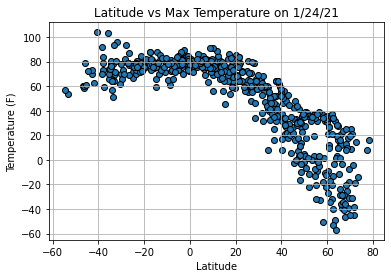

In [12]:
#Creating Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor = 'black')
plt.title("Latitude vs Max Temperature on 1/24/21")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle= '-')

#Saving Plot Image
plt.savefig("../Images/Latitude vs Temperature.png")

Temperatures hold steady between -40 and 20 latitudes, but start to regress after 20 Latitude.

## Latitude vs. Humidity Plot

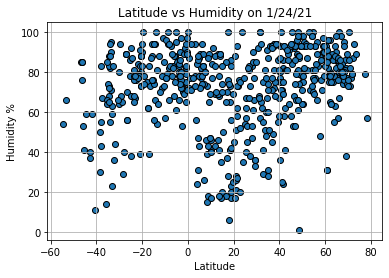

In [14]:
#Creating Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor = 'black')
plt.title("Latitude vs Humidity on 1/24/21")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(linestyle= '-')

#Saving Plot Image
plt.savefig("../Images/Latitude vs Humidity.png")

There does not appear to be any correlation between latitude and humidity percent.

## Latitude vs. Cloudiness Plot

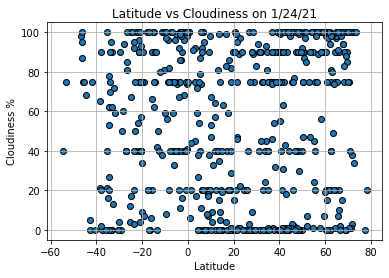

In [23]:
#Creating Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor = 'black')
plt.title("Latitude vs Cloudiness on 1/24/21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(linestyle= '-')

#Saving Plot Image
plt.savefig("../Images/Latitude vs Cloudiness.png")

No relation between latitude and cloudiness it seems.

## Latitude vs. Wind Speed Plot

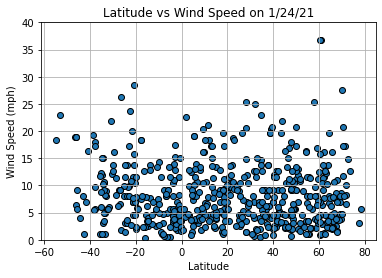

In [25]:
#Creating Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor = 'black')
plt.title("Latitude vs Wind Speed on 1/24/21")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle= '-')
plt.ylim(0,40)

#Saving Plot Image
plt.savefig("../Images/Latitude vs Wind Speed.png")

It was relatively mild winds on 1/24/21 for all cities, with most falling between 0-15 mph for the random city sample.

## Linear Regression

In [49]:
#Splitting data into north & south hemispheres
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0] #389 count
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0] #181 count

#Making life easy and creating a function for linear regression
#Also came back to add scatter plot here as well
def LinearRegression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
    line_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot (x_values,line_values,"r-")
    #Labels for plots
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), color="red")

    print(f"The r-squared value is: {rvalue}")

plt.show()

In [31]:
import scipy.stats as st

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.8592205920287521


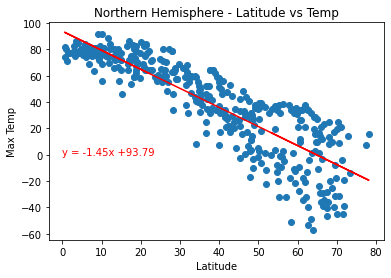

In [59]:
#Create plot & line
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
LinearRegression(x_values, y_values)
plt.title("Northern Hemisphere - Latitude vs Temp")
#Save Image of plot & line
plt.savefig("../Images/Northern Hemisphere Latitude vs Max Temp.png")

There is a strong negative correlation in the northern hemisphere between latitude and temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3679861238719989


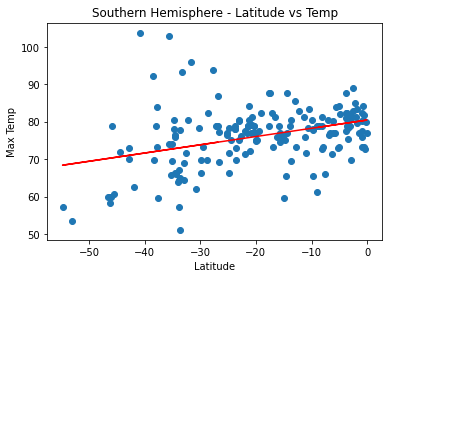

In [60]:
#Create plot & line
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
LinearRegression(x_values, y_values)
plt.title("Southern Hemisphere - Latitude vs Temp")

#Save Image of plot & line
plt.savefig("../Images/Southern Hemisphere Latitude vs Max Temp.png")

There is a moderate positive correleation between latitude and temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.34944288625870545


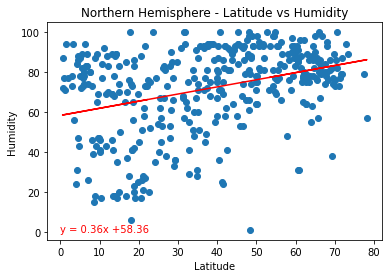

In [61]:
#Create plot & line
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
LinearRegression(x_values, y_values)
plt.title("Northern Hemisphere - Latitude vs Humidity")

#Save Image of plot & line
plt.savefig("../Images/Northern Hemisphere Latitude vs Humidity.png")

There is a moderate positive correleation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.4074451333347906


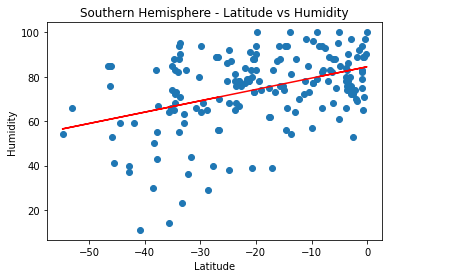

In [62]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
LinearRegression(x_values, y_values)
plt.title("Southern Hemisphere - Latitude vs Humidity")
#Save Image of plot & line
plt.savefig("../Images/Southern Hemisphere Latitude vs Humidity.png")

There is a moderate positive correleation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.25764238625540786


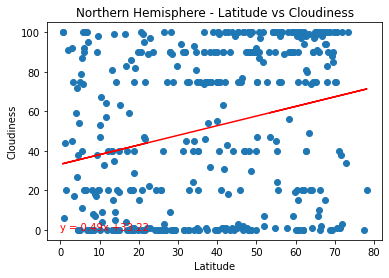

In [63]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
LinearRegression(x_values, y_values)
plt.title("Northern Hemisphere - Latitude vs Cloudiness")

#Save Image of plot & line
plt.savefig("../Images/Northern Hemisphere Latitude vs Cloudiness.png")

There is a slight positive correleation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.2611334289880333


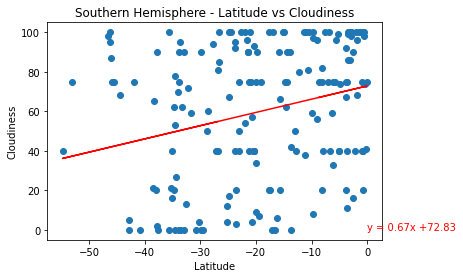

In [64]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
LinearRegression(x_values, y_values)
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
#Save Image of plot & line
plt.savefig("../Images/Southern Hemisphere Latitude vs Cloudiness.png")

There is a slight positive correleation between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.01680254782158692


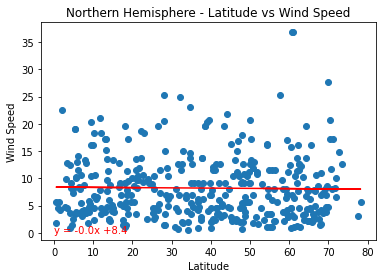

In [65]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
LinearRegression(x_values, y_values)
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
#Save Image of plot & line
plt.savefig("../Images/Northern Hemisphere Latitude vs Wind Speed.png")

There is no correlation between wind speed and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.3243071326164469


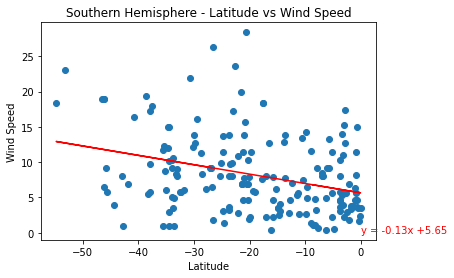

In [66]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
LinearRegression(x_values, y_values)
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
#Save Image of plot & line
plt.savefig("../Images/Southern Hemisphere Latitude vs Wind Speed.png")

There is a moderate negative correlation between latitude and wind speed in the southern hemisphere.